In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
import xgboost as xgb
import numpy as np
from scipy.stats import uniform, randint
import seaborn as sns
from sklearn.metrics import mean_squared_error, mean_absolute_error
import re
import matplotlib.pyplot as plt
import eli5
from eli5.sklearn import PermutationImportance 
from sklearn.ensemble import RandomForestRegressor
%matplotlib inline

/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.metrics.scorer module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.metrics. Anything that cannot be imported from sklearn.metrics is now part of the private API.
  warnings.warn(message, FutureWarning)
/home/swagmaster/anaconda3/envs/wiita/lib/python3.8/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.feature_selection.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.feature_selection. Anything that cannot be imported from sklearn.feature_selection is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
goi_id = [
         'ENSG00000141905', #NFIC
         'ENSG00000185811', #IKZF1
         'ENSG00000100811', #YY1
         'ENSG00000143437', #ARNT
         'ENSG00000120837', #NFYB
         'ENSG00000115966', #ATF2
         'ENSG00000185591', #SP1
         'ENSG00000170345', #FOS
         'ENSG00000118260', #CREB1
         'ENSG00000028277', #POU2f2
         'ENSG00000112592', #TBP
         'ENSG00000103495', #MAZ
         'ENSG00000101076', #HNF4A
         'ENSG00000175745', #NR2F1
         'ENSG00000126561', #STAT5A
         'ENSG00000120690', #ELF1
         'ENSG00000179348', #GATA2
         'ENSG00000068305', #MEF2A
         'ENSG00000173039', #RELA
         'ENSG00000066336', #SPI1
         'ENSG00000131196', #NFATC1
         'ENSG00000130522', #JUND
         'ENSG00000118513', #MYB
         'ENSG00000196092', #PAX5
         'ENSG00000164330', #EBF1
         'ENSG00000172216', #CEBPB
         'ENSG00000171223', #JUNB
         'ENSG00000141568', #FOXK2
         'ENSG00000119950', #MXI1
         'ENSG00000147133', #TAF1
         'ENSG00000143373', #ZNF687
         'ENSG00000107485', #GATA3
         'ENSG00000120798', #NR2C1
         'ENSG00000175029', #CTBP2
         'ENSG00000010244', #ZNF207
         'ENSG00000168610', #STAT3
         'ENSG00000170365', #SMAD1
         'ENSG00000169375', #SIN3A
         'ENSG00000167081', #PBX3
         'ENSG00000182979', #MTA1
         'ENSG00000106462', #EZH2
         'ENSG00000148516', #ZEB1
         'ENSG00000089902', #RCOR1
         'ENSG00000143889', #HNRNPLL
         'ENSG00000112658', #SRF
         'ENSG00000069399', #BCL3
         'ENSG00000164754', #RAD21
         'ENSG00000102554', #KLF5
         'ENSG00000125952', #MAX
         'ENSG00000136997', #MYC
         'ENSG00000156273', #BACH1
         'ENSG00000171940', #ZNF217
         'ENSG00000139083', #ETV6
         'ENSG00000074266', #EED
         'ENSG00000119866', #BCL11A
         'ENSG00000104320', #NBN
         'ENSG00000100393', #EP300
         'ENSG00000140262', #TCF12
         'ENSG00000149480', #MTA2
         'ENSG00000104856', #RELB
         'ENSG00000156127', #BATF
         'ENSG00000134107', #BHLHE40
         'ENSG00000073861', #TBX21
         'ENSG00000020633', #RUNX3
         'ENSG00000100219', #XBP1
         'ENSG00000168310', #IRF2
         'ENSG00000115415', #STAT1
         'ENSG00000049768', #FOXP3
         'ENSG00000196628', #TCF4
         'ENSG00000151090', #THRB
         'ENSG00000129514', #FOXA1
         'ENSG00000181195', #PENK
         'ENSG00000091831', #ESR1
         'ENSG00000197780', #TAF13
         'ENSG00000082175', #PGR
         'ENSG00000135100', #HNF1A
         'ENSG00000143190', #POU2F1
         'ENSG00000101096', #NFATC2
         'ENSG00000186350', #RXRA
         'ENSG00000169083', #AR
         'ENSG00000128710', #HOXD10
         'ENSG00000077092', #RARB
         'ENSG00000111424', #VDR
         'ENSG00000005436', #GCFC2
         'ENSG00000123268', #ATF1
         'ENSG00000168214', #RBPJ
         'ENSG00000113580', #NR3C1
         'ENSG00000141510', #TP53
         'ENSG00000184895', #SRY
         'ENSG00000245848', #CEBPA
         'ENSG00000128709', #HOXD9
         'ENSG00000162772', #ATF3
         'ENSG00000175832', #ETV4
         'ENSG00000101412', #E2F1
         'ENSG00000140374', #ETFA
         'ENSG00000105379', #ETFB
         'ENSG00000179388', #EGR3
         'ENSG00000184937', #WT1
         'ENSG00000106546', #AHR
         'ENSG00000131759', #RARA
         'ENSG00000109320', #NFKB1
         'ENSG00000105698', #USF2
         'ENSG00000125347', #IRF1
         'ENSG00000138795', #LEF1
         'ENSG00000126767', #ELK1
         'ENSG00000138378', #STAT4
         'ENSG00000102145', #GATA1
         'ENSG00000157557', #ETS2
         'ENSG00000134954', #ETS1
         'ENSG00000004468' #CD38
        ]

def display_scores(scores):
    print("Scores: {0}\nMean: {1:.3f}\nStd: {2:.3f}".format(scores, np.mean(scores), np.std(scores)))
    
def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
#         i = 201 - i
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            print("Model with rank: {0}".format(i))
            print("Mean validation score: {0:.3f} (std: {1:.3f})".format(
                  results['mean_test_score'][candidate],
                  results['std_test_score'][candidate]))
            print("Parameters: {0}".format(results['params'][candidate]))
            print("")

In [3]:
pat = pd.read_csv('~/COMMPASS/COMMPASS/IA13/Expression Estimates - Gene Based/MMRF_CoMMpass_IA13a_E74GTF_HtSeq_Gene_Counts.csv')
pat = pat.set_index(pat.GENE_ID)
pat = pat.drop(columns = 'GENE_ID')
pat = pat.loc[:, pat.columns.str.endswith('1_BM') | pat.columns.str.endswith('1_PB')]

cell = pd.read_csv('HMCL66_HTSeq_GENE_Counts_v2.csv')
cell = cell.set_index(cell.Sample)
cell = cell.drop(['Sample', 'GENE_NAME'], axis = 1)

ccle = pd.read_csv('CCLE_RNAseq_genes_counts_20180929.csv')
ccle['Name'] = ccle.Name.map(lambda x : re.sub('\.\d+$', '', x))
ccle = ccle.set_index(ccle.Name)
ccle = ccle.drop(['Name', 'Description'], axis = 1)
ccle_hlt = ccle.loc[:,ccle.columns.map(lambda x : x.endswith('HAEMATOPOIETIC_AND_LYMPHOID_TISSUE'))]

goi_names = pd.read_csv('cd138genes.csv', header = None)
goi_names = goi_names.rename({0 :'GENE_NAMES'}, axis = 1)

goi_pat = pat.loc[goi_id]
goi_pat = goi_pat.set_index(goi_names.iloc[:, 0])
goi_pat = goi_pat.T
goi_pat_log = np.log2(goi_pat)
goi_pat_log = goi_pat_log.replace(-np.inf, 0)

y_log = goi_pat_log.CD38
X_log = goi_pat_log.drop('CD38', axis = 1)

X_log_train, X_log_test, y_log_train, y_log_test = train_test_split(X_log, y_log, test_size=0.2, 
                                                                    random_state=42)

<ipython-input-3-c187ce03feea>:22: RuntimeWarning: divide by zero encountered in log2
  goi_pat_log = np.log2(goi_pat)


In [4]:
regr = RandomForestRegressor(random_state=0, n_jobs = -1, criterion = 'mae')

regr.fit(X_log_train, y_log_train)

y_pred_regr = regr.predict(X_log_test)

y_pred_regr = pd.Series(y_pred_regr, index = y_log_test.index)

xgb_model = xgb.XGBRegressor(n_jobs = -1, random_state = 42, colsample_bylevel = 0.5658140364286011, 
                              colsample_bynode = 0.8078536842438382, colsample_bytree = 0.7051418651679482, 
                              gamma = 0.7909390660598336, learning_rate = 0.0968001207373439, 
                              max_depth = 2, n_estimators = 183, subsample = 0.8963379482245502)

xgb_model.fit(X_log_train, y_log_train, eval_metric = 'mae')

y_pred_xgb = xgb_model.predict(X_log_test)

y_pred_xgb = pd.Series(y_pred_xgb, index = y_log_test.index)

In [5]:
test = pd.DataFrame({'xgb': [mean_absolute_error(y_log_test, y_pred_xgb)], 
              'rf': [mean_absolute_error(y_log_test, y_pred_regr)]})

In [6]:
y_pred_regr = pd.DataFrame(y_pred_regr)
y_pred_regr.columns = ['CD38predicted']

y_pred_regr['CD38'] = y_log_test
y_pred_regr['Type'] = 'Testing Data RF'

y_pred_regr_train = regr.predict(X_log_train)

y_pred_regr_train = pd.Series(y_pred_regr_train, index = y_log_train.index)

y_pred_regr_train = pd.DataFrame(y_pred_regr_train)
y_pred_regr_train.columns = ['CD38predicted']

y_pred_regr_train['CD38'] = y_log_train
y_pred_regr_train['Type'] = 'Training Data RF'
y_pred_regr_comb = pd.concat([y_pred_regr, y_pred_regr_train])

y_pred_xgb = pd.DataFrame(y_pred_xgb)
y_pred_xgb.columns = ['CD38predicted']

y_pred_xgb['CD38'] = y_log_test
y_pred_xgb['Type'] = 'Testing Data XGB'

y_pred_xgb_train = xgb_model.predict(X_log_train)

y_pred_xgb_train = pd.Series(y_pred_xgb_train, index = y_log_train.index)

y_pred_xgb_train = pd.DataFrame(y_pred_xgb_train)
y_pred_xgb_train.columns = ['CD38predicted']

y_pred_xgb_train['CD38'] = y_log_train
y_pred_xgb_train['Type'] = 'Training Data XGB'
y_pred_xgb_comb = pd.concat([y_pred_xgb, y_pred_xgb_train])

y_pred_comb = pd.concat([y_pred_xgb_comb, y_pred_regr_comb])

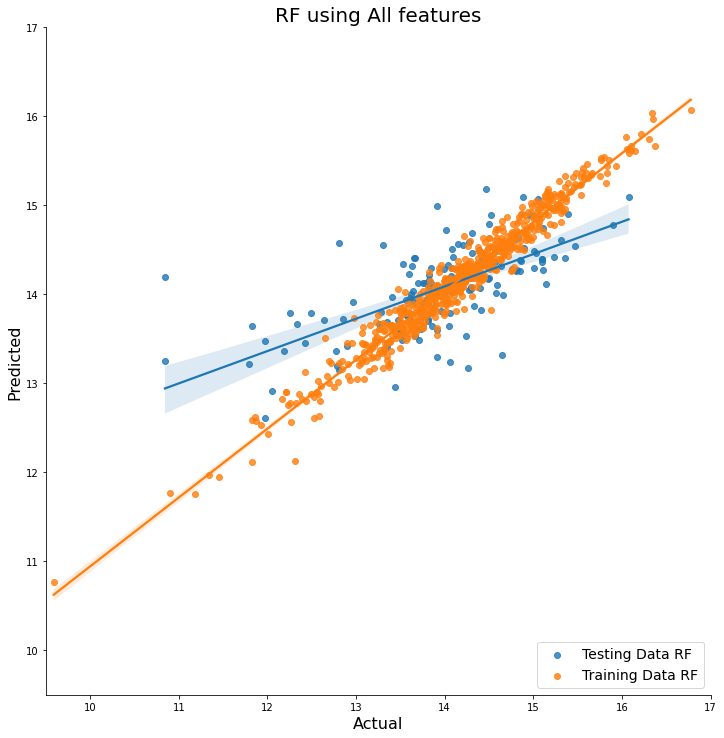

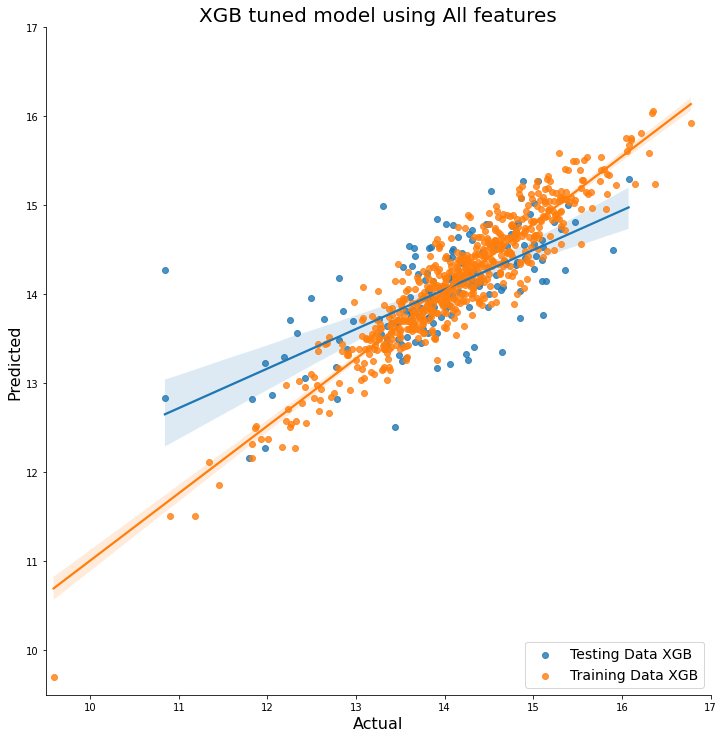

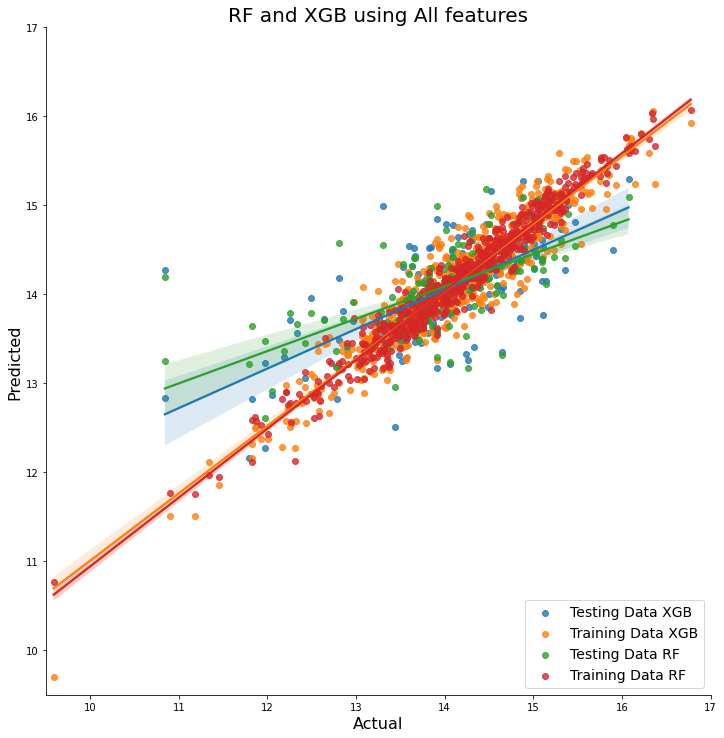

In [7]:
sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'Type', data = y_pred_regr_comb, height = 10, legend = False)

plt.xlabel('Actual', size = 16)

plt.ylabel('Predicted', size = 16)

plt.ylim(9.5, 17)
plt.xlim(9.5, 17)

plt.legend(loc = 'lower right', fontsize = 14)

plt.title('RF using All features', size = 20)

plt.show()

sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'Type', data = y_pred_xgb_comb, height = 10, legend = False)

plt.xlabel('Actual', size = 16)

plt.ylabel('Predicted', size = 16)

plt.ylim(9.5, 17)
plt.xlim(9.5, 17)

plt.legend(loc = 'lower right', fontsize = 14)

plt.title('XGB tuned model using All features', size = 20)

plt.show()

sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'Type', data = y_pred_comb, height = 10, legend = False)

plt.xlabel('Actual', size = 16)

plt.ylabel('Predicted', size = 16)

plt.ylim(9.5, 17)
plt.xlim(9.5, 17)

plt.legend(loc = 'lower right', fontsize = 14)

plt.title('RF and XGB using All features', size = 20)

plt.show()

In [8]:
X_log_train_og = X_log_train
X_log_test_og = X_log_test

In [9]:
X_log_corr = X_log.corrwith(y_log, method = 'spearman').abs().sort_values(ascending = False)

In [10]:
X_log_corr.to_csv('CD38_corr.csv')

In [11]:
X_log_train = X_log_train[X_log_corr[:20].index]
X_log_test = X_log_test[X_log_corr[:20].index]

In [12]:
regr = RandomForestRegressor(random_state=0, n_jobs = -1, criterion = 'mae')

regr.fit(X_log_train, y_log_train)

y_pred_regr = regr.predict(X_log_test)

y_pred_regr = pd.Series(y_pred_regr, index = y_log_test.index)

xgb_model = xgb.XGBRegressor(n_jobs = -1, random_state = 42, colsample_bylevel = 0.5658140364286011, 
                              colsample_bynode = 0.8078536842438382, colsample_bytree = 0.7051418651679482, 
                              gamma = 0.7909390660598336, learning_rate = 0.0968001207373439, 
                              max_depth = 2, n_estimators = 183, subsample = 0.8963379482245502)

xgb_model.fit(X_log_train, y_log_train, eval_metric = 'mae')

y_pred_xgb = xgb_model.predict(X_log_test)

y_pred_xgb = pd.Series(y_pred_xgb, index = y_log_test.index)

In [13]:
test.loc[len(test.index)] = [mean_absolute_error(y_log_test, y_pred_xgb), mean_absolute_error(y_log_test, y_pred_regr)]

In [14]:
y_pred_regr = pd.DataFrame(y_pred_regr)
y_pred_regr.columns = ['CD38predicted']

y_pred_regr['CD38'] = y_log_test
y_pred_regr['Type'] = 'Testing Data RF'

y_pred_regr_train = regr.predict(X_log_train)

y_pred_regr_train = pd.Series(y_pred_regr_train, index = y_log_train.index)

y_pred_regr_train = pd.DataFrame(y_pred_regr_train)
y_pred_regr_train.columns = ['CD38predicted']

y_pred_regr_train['CD38'] = y_log_train
y_pred_regr_train['Type'] = 'Training Data RF'
y_pred_regr_comb = pd.concat([y_pred_regr, y_pred_regr_train])

y_pred_xgb = pd.DataFrame(y_pred_xgb)
y_pred_xgb.columns = ['CD38predicted']

y_pred_xgb['CD38'] = y_log_test
y_pred_xgb['Type'] = 'Testing Data XGB'

y_pred_xgb_train = xgb_model.predict(X_log_train)

y_pred_xgb_train = pd.Series(y_pred_xgb_train, index = y_log_train.index)

y_pred_xgb_train = pd.DataFrame(y_pred_xgb_train)
y_pred_xgb_train.columns = ['CD38predicted']

y_pred_xgb_train['CD38'] = y_log_train
y_pred_xgb_train['Type'] = 'Training Data XGB'
y_pred_xgb_comb = pd.concat([y_pred_xgb, y_pred_xgb_train])

y_pred_comb = pd.concat([y_pred_xgb_comb, y_pred_regr_comb])

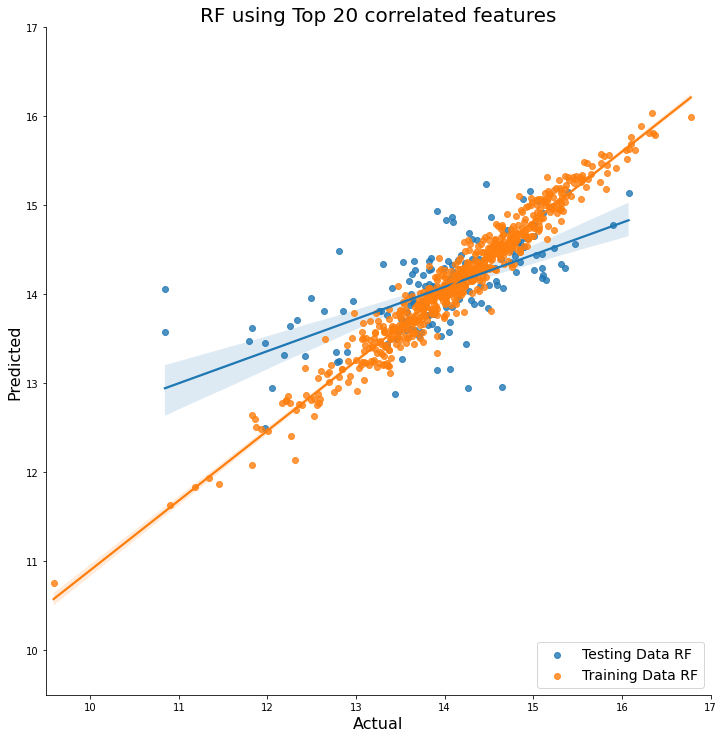

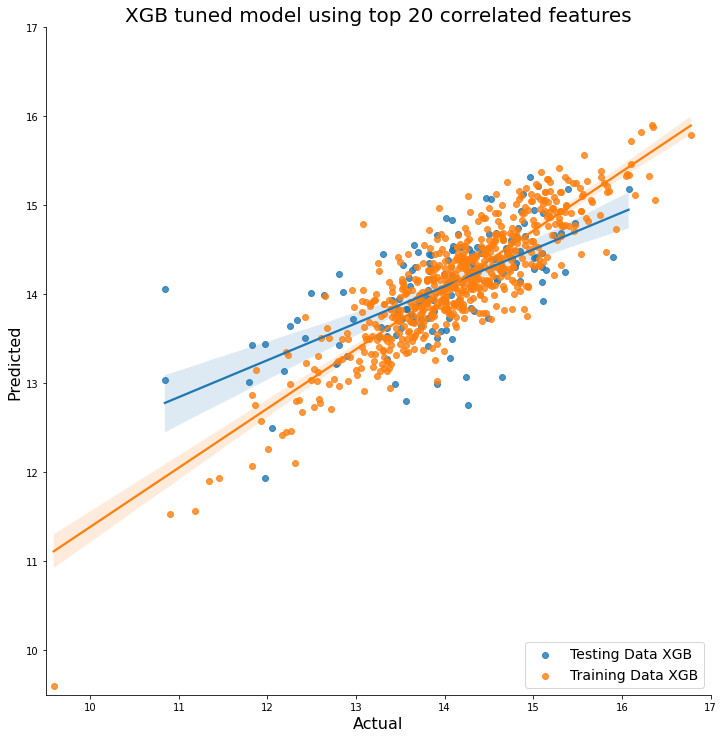

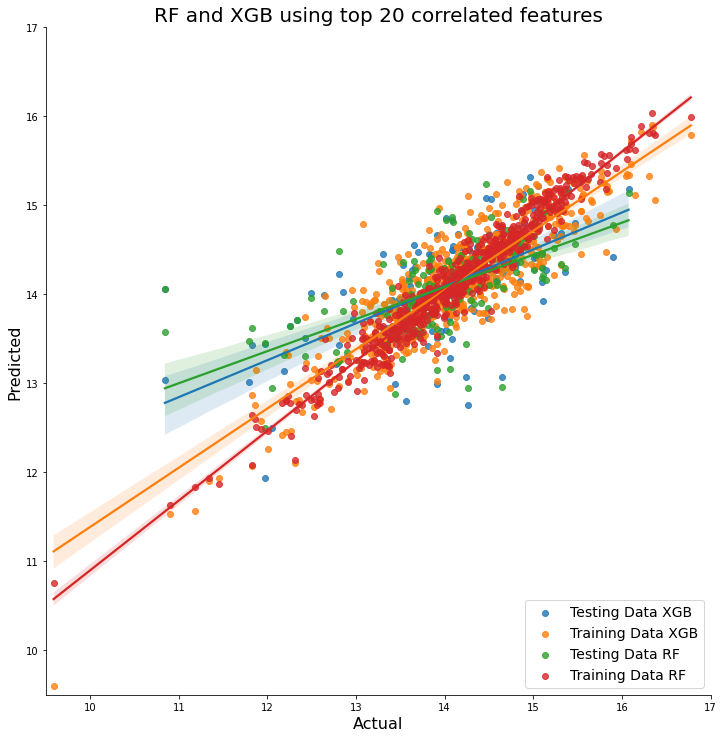

In [15]:
sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'Type', data = y_pred_regr_comb, height = 10, legend = False)

plt.xlabel('Actual', size = 16)

plt.ylabel('Predicted', size = 16)

plt.ylim(9.5, 17)
plt.xlim(9.5, 17)

plt.legend(loc = 'lower right', fontsize = 14)

plt.title('RF using Top 20 correlated features', size = 20)

plt.show()

sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'Type', data = y_pred_xgb_comb, height = 10, legend = False)

plt.xlabel('Actual', size = 16)

plt.ylabel('Predicted', size = 16)

plt.ylim(9.5, 17)
plt.xlim(9.5, 17)

plt.legend(loc = 'lower right', fontsize = 14)

plt.title('XGB tuned model using top 20 correlated features', size = 20)

plt.show()

sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'Type', data = y_pred_comb, height = 10, legend = False)

plt.xlabel('Actual', size = 16)

plt.ylabel('Predicted', size = 16)

plt.ylim(9.5, 17)
plt.xlim(9.5, 17)

plt.legend(loc = 'lower right', fontsize = 14)

plt.title('RF and XGB using top 20 correlated features', size = 20)

plt.show()

In [16]:
X_log_train = X_log_train_og
X_log_test = X_log_test_og

In [17]:
regr = RandomForestRegressor(random_state=0, n_jobs = -1, criterion = 'mae')

regr.fit(X_log_train, y_log_train)

xgb_model = xgb.XGBRegressor(n_jobs = -1, random_state = 42, colsample_bylevel = 0.5658140364286011, 
                              colsample_bynode = 0.8078536842438382, colsample_bytree = 0.7051418651679482, 
                              gamma = 0.7909390660598336, learning_rate = 0.0968001207373439, 
                              max_depth = 2, n_estimators = 183, subsample = 0.8963379482245502)

xgb_model.fit(X_log_train, y_log_train, eval_metric = 'mae')

XGBRegressor(base_score=0.5, booster=None, colsample_bylevel=0.5658140364286011,
             colsample_bynode=0.8078536842438382,
             colsample_bytree=0.7051418651679482, gamma=0.7909390660598336,
             gpu_id=-1, importance_type='gain', interaction_constraints=None,
             learning_rate=0.0968001207373439, max_delta_step=0, max_depth=2,
             min_child_weight=1, missing=nan, monotone_constraints=None,
             n_estimators=183, n_jobs=-1, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
             subsample=0.8963379482245502, tree_method=None,
             validate_parameters=False, verbosity=None)

In [18]:
perm = PermutationImportance(xgb_model, random_state=1).fit(X_log_test, y_log_test)

In [19]:
perm_xgb = eli5.formatters.as_dataframe.explain_weights_df(perm, feature_names = X_log_test.columns.tolist())
perm_xgb.to_csv('CD38_XGB_perm.csv')

In [20]:
perm = PermutationImportance(regr, random_state=1).fit(X_log_test, y_log_test)

In [21]:
perm_regr = eli5.formatters.as_dataframe.explain_weights_df(perm, feature_names = X_log_test.columns.tolist())
perm_regr.to_csv('CD38_RF_perm.csv')

In [22]:
X_log_train = X_log_train[perm_regr.loc[:19, 'feature']]
X_log_test = X_log_test[perm_regr.loc[:19, 'feature']]

regr = RandomForestRegressor(random_state=0, n_jobs = -1, criterion = 'mae')

regr.fit(X_log_train, y_log_train)

y_pred_regr = regr.predict(X_log_test)

y_pred_regr = pd.Series(y_pred_regr, index = y_log_test.index)

X_log_train = X_log_train_og
X_log_test = X_log_test_og
X_log_train = X_log_train[perm_xgb.loc[:19, 'feature']]
X_log_test = X_log_test[perm_xgb.loc[:19, 'feature']]

xgb_model = xgb.XGBRegressor(n_jobs = -1, random_state = 42, colsample_bylevel = 0.5658140364286011, 
                              colsample_bynode = 0.8078536842438382, colsample_bytree = 0.7051418651679482, 
                              gamma = 0.7909390660598336, learning_rate = 0.0968001207373439, 
                              max_depth = 2, n_estimators = 183, subsample = 0.8963379482245502)

xgb_model.fit(X_log_train, y_log_train, eval_metric = 'mae')

y_pred_xgb = xgb_model.predict(X_log_test)

y_pred_xgb = pd.Series(y_pred_xgb, index = y_log_test.index)

In [23]:
test.loc[len(test.index)] = [mean_absolute_error(y_log_test, y_pred_xgb), mean_absolute_error(y_log_test, y_pred_regr)]
test.index = ['all', 't20_corr', 't20_perm']
test.to_csv('CD38_MAE.csv')

In [24]:
y_pred_regr = pd.DataFrame(y_pred_regr)
y_pred_regr.columns = ['CD38predicted']

y_pred_regr['CD38'] = y_log_test
y_pred_regr['Type'] = 'Testing Data RF'

X_log_train = X_log_train_og
X_log_train = X_log_train[perm_regr.loc[:19, 'feature']]

y_pred_regr_train = regr.predict(X_log_train)

y_pred_regr_train = pd.Series(y_pred_regr_train, index = y_log_train.index)

y_pred_regr_train = pd.DataFrame(y_pred_regr_train)
y_pred_regr_train.columns = ['CD38predicted']

y_pred_regr_train['CD38'] = y_log_train
y_pred_regr_train['Type'] = 'Training Data RF'
y_pred_regr_comb = pd.concat([y_pred_regr, y_pred_regr_train])

y_pred_xgb = pd.DataFrame(y_pred_xgb)
y_pred_xgb.columns = ['CD38predicted']

y_pred_xgb['CD38'] = y_log_test
y_pred_xgb['Type'] = 'Testing Data XGB'

X_log_train = X_log_train_og
X_log_train = X_log_train[perm_xgb.loc[:19, 'feature']]

y_pred_xgb_train = xgb_model.predict(X_log_train)

y_pred_xgb_train = pd.Series(y_pred_xgb_train, index = y_log_train.index)

y_pred_xgb_train = pd.DataFrame(y_pred_xgb_train)
y_pred_xgb_train.columns = ['CD38predicted']

y_pred_xgb_train['CD38'] = y_log_train
y_pred_xgb_train['Type'] = 'Training Data XGB'
y_pred_xgb_comb = pd.concat([y_pred_xgb, y_pred_xgb_train])

y_pred_comb = pd.concat([y_pred_xgb_comb, y_pred_regr_comb])

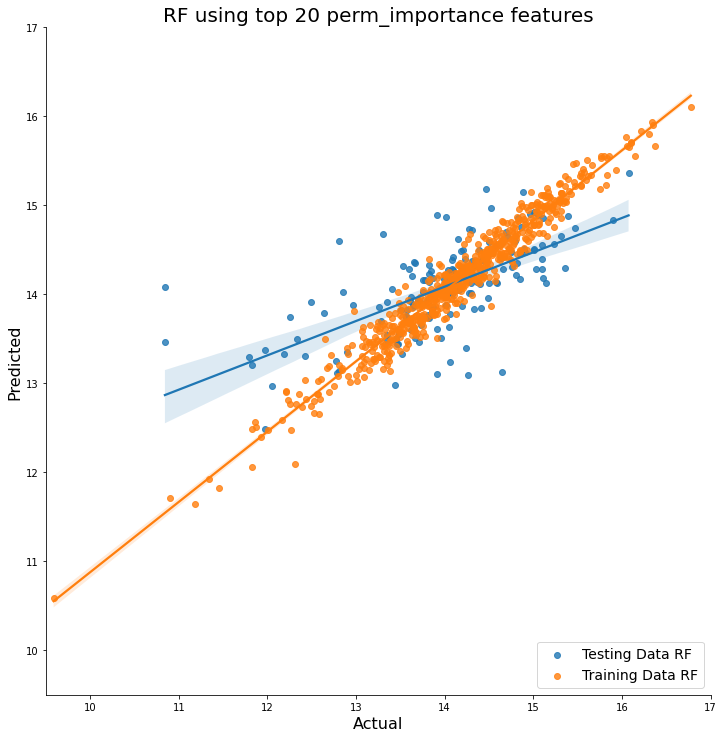

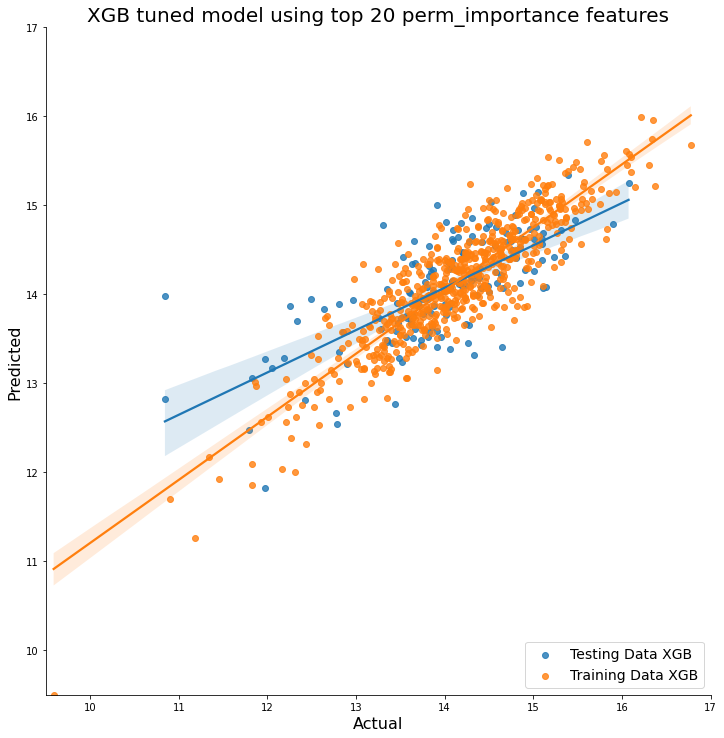

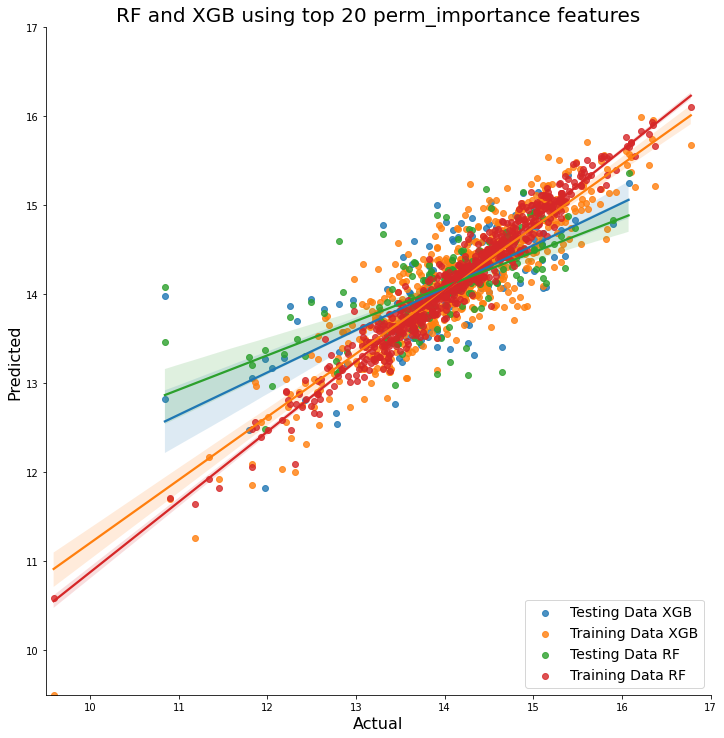

In [25]:
sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'Type', data = y_pred_regr_comb, height = 10, legend = False)

plt.xlabel('Actual', size = 16)

plt.ylabel('Predicted', size = 16)

plt.ylim(9.5, 17)
plt.xlim(9.5, 17)

plt.legend(loc = 'lower right', fontsize = 14)

plt.title('RF using top 20 perm_importance features', size = 20)

plt.show()

sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'Type', data = y_pred_xgb_comb, height = 10, legend = False)

plt.xlabel('Actual', size = 16)

plt.ylabel('Predicted', size = 16)

plt.ylim(9.5, 17)
plt.xlim(9.5, 17)

plt.legend(loc = 'lower right', fontsize = 14)

plt.title('XGB tuned model using top 20 perm_importance features', size = 20)

plt.show()

sns.lmplot(x = 'CD38', y = 'CD38predicted', hue = 'Type', data = y_pred_comb, height = 10, legend = False)

plt.xlabel('Actual', size = 16)

plt.ylabel('Predicted', size = 16)

plt.ylim(9.5, 17)
plt.xlim(9.5, 17)

plt.legend(loc = 'lower right', fontsize = 14)

plt.title('RF and XGB using top 20 perm_importance features', size = 20)

plt.show()